# Analysis.ipynb   
### A project analysing the Iris dataset   
### Author: Paul O'Shaughnessy

***

## **1. Setup**

### 1.1 Firstly, the various libraries to be used are imported:

- ***Pandas*** is a Python Library used for cleaning, analyzing and manipulating data. More information can be found [here](https://pandas.pydata.org/docs/).   
    - Pandas Dataframe functionality will be used frequently. More information on Pandas Dataframes can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html).   

- ***NumPy*** is a Python Library for working with arrays, linear algebra, and matrices. More information can be found [here](https://numpy.org/).
- ***Matplotlib*** is a comprehensive Python library for creating static, animated, and interactive visualizations in Python. More information can be found [here](https://matplotlib.org/).
- ***Seaborn*** is a Python data visualization library based on matplotlib. More information can be found [here](https://seaborn.pydata.org/).   
- ***Warnings*** is used to suppress unnecessary warnings. More information can be found [here](https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings).

In [1]:
# Import Libraries to be used for analysis of dataset
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
from seaborn import pairplot

### 1.2 The Iris dataset is then imported:

In [2]:
# Import iris dataset from the csv file in this project folder. Assign iris as the dataframe name. Include header=None as there are no column titles on the csv file.
iris = pd.read_csv('iris.data', header=None)


### 1.3 No Column names were in the dataset so they need to get added:

In [3]:
# Assign Column titles to dataset
iris.columns = [
                'sepal_length_cm', 
                'sepal_width_cm', 
                'petal_length_cm', 
                'petal_width_cm', 
                'class'
                ]

### 1.4 Check that the Column names have been added as expected:

In [4]:
# Check Column titles have assigned. Use Pandas head() method.
iris.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.5 Check all 150 rows have imported and that there are no null values

In [5]:
# Use Pandas info() method.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## **2. Summary Data**

### 2.1 The describe() method outputs summary data for each numerical variable:

In [6]:
# Generate summary data for the numerical variables for all species combined.
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 2.1.1 To output the above data in a txt file, the code below is used:

In [7]:
# Assign a variable to the summary dataframe.
summary = iris.describe() 

# Export the summary dataframe as a txt file
summary.to_string('summary.txt')

### 2.2 Summary Data by Measurement Variable

#### *2.2.1 Sepal Length Summary Data*

In [8]:
# Generate summary data for sepal length for each species
iris.groupby(['class']).describe()['sepal_length_cm']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


#### *2.2.2 Sepal Width Summary Data*

In [9]:
# Generate summary data for sepal width for each species
iris.groupby(['class']).describe()['sepal_width_cm']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


#### *2.2.3 Petal Length Summary Data*

In [10]:
# Generate summary data for petal length for each species
iris.groupby(['class']).describe()['petal_length_cm']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


#### *2.2.4 Petal Width Summary Data*

In [11]:
# Generate summary data for petal width for each species
iris.groupby(['class']).describe()['petal_width_cm']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,0.244,0.107210,0.1,0.2,0.2,0.3,0.6
Iris-versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
Iris-virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


### 2.3 Summary Data by Species

#### *2.3.1 Iris Setosa Summary Data*

In [12]:
# Generate summary data specific to Iris-setosa only.
setosa = iris[iris['class'] == 'Iris-setosa'] 
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


#### *2.3.2 Iris Versicolor Summary Data*

In [13]:
# Generate summary data specific to Iris-versicolor only.
vers = iris[iris['class'] == 'Iris-versicolor'] 
vers.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


#### 2.3.3 Iris Virginica Summary Data

In [20]:
# Generate summary data specific to Iris-virginica only. 
virg = iris[iris['class'] == 'Iris-virginica'] 
virg.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


### 2.4 Plot averages of measurement variables for each species

[Text(0.5, 1.0, 'Average Petal Width')]

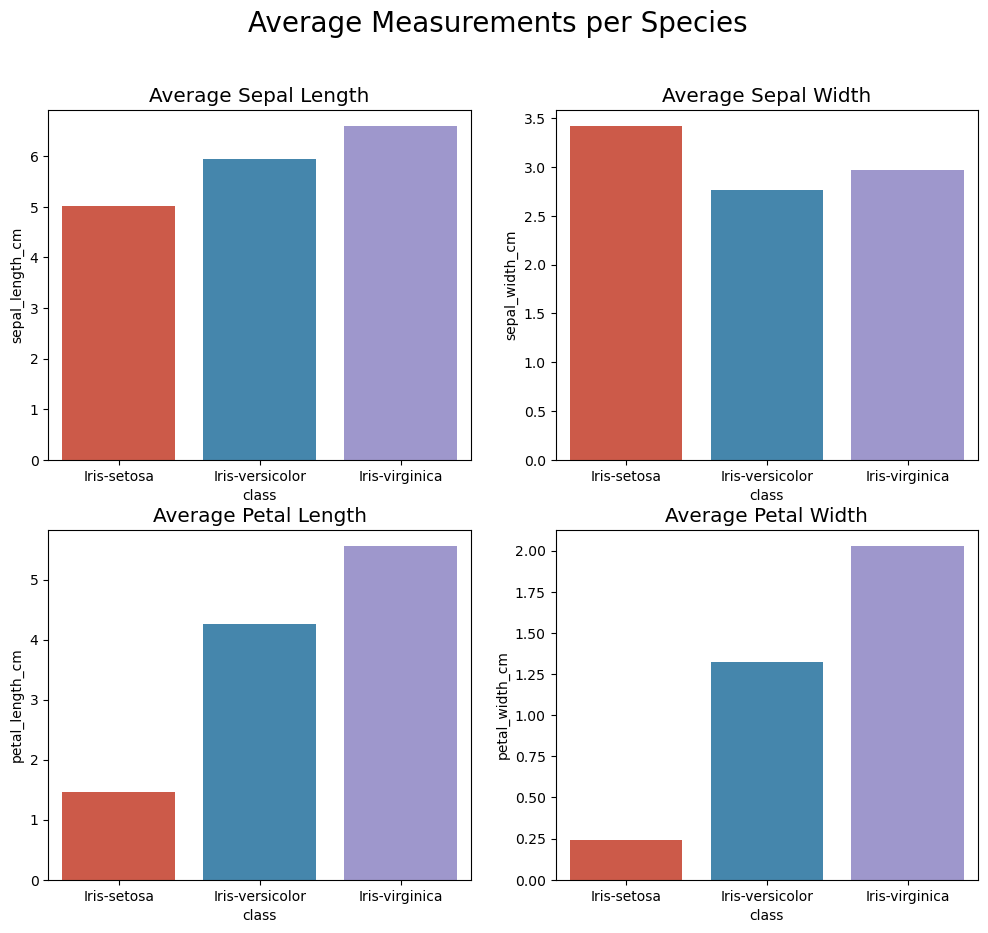

In [15]:
# Set up the structure of the figure and number of axes.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Average Measurements per Species', fontsize=20)
plt.style.use('ggplot')

# Setup the variable to be plotted and analysed in each axes.
sns.barplot(data=iris, x='class', y='sepal_length_cm', ax=axes[0, 0], errorbar=None).set(title='Average Sepal Length')
sns.barplot(data=iris, x='class', y='sepal_width_cm', ax=axes[0, 1], errorbar=None).set(title='Average Sepal Width')
sns.barplot(data=iris, x='class', y='petal_length_cm', ax=axes[1, 0], errorbar=None).set(title='Average Petal Length')
sns.barplot(data=iris, x='class', y='petal_width_cm', ax=axes[1, 1], errorbar=None).set(title='Average Petal Width')

### 2.5 Interpretation of Summary Data and Averages

 - Iris Virginica is the largest species on average in three of the four measurement categories, with the exception of sepal width.
- Iris Setosa is the smallest species on average in three of the four measurement categories, with the exception of sepal width, where it is the largest.  
- Iris Setosa having the largest sepal width, whereas being the smallest species across the three other measurement variables, seems odd and warrants further investigation which is contained in the next section.

### 2.6 Setosa Sepal Width Investigation

#### 2.6.1 Standard Deviation

In [26]:
# Standard Deviation of Setosa Sepal Widths

# Create a dataframe with Setosa data only.
seto = iris[iris['class'] == 'Iris-setosa']
# Generate the standard deviation for the sepal width column only. 
sd = seto['sepal_width_cm'].std()
# Round the figure to 5 decimal places.
round(sd, 5)

0.38102

- Per the above, the Standard Deviation of the Setosa sepal widths is 0.38102. This means none of the values deviate more or less than 0.38102 centimetres from the mean of 3.418 centimetres, which suggests there are no outliers skewing the mean of the sepal width values for the Setosa species.

#### 2.6.2 Boxplot to identify any outliers

- Per the pandas webpage for boxplots, located [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html), "a box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. The position of the whiskers is set by default to 1.5*IQR (IQR = Q3 - Q1) from the edges of the box. Outlier points are those past the end of the whiskers."

<Axes: >

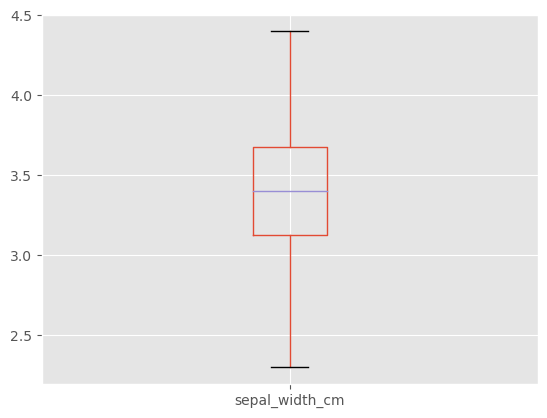

In [29]:
# Boxplot for Setosa sepal widths.

# Create a dataframe with Setosa data only.
seto = iris[iris['class'] == 'Iris-setosa']
# Generate a boxplot for the sepal width column only
seto.boxplot(['sepal_width_cm'])

- As inferred from the Standard Deviation calculation in 2.6.1, the boxplot analysis above is not showing any sepal width values that could be considered outliers. 
- Therefore it is safe to assume the values for the Iris Setosa sepal widths are legitimate, are not being skewed, and that there is no error with Iris Setosa having the largest sepal widths on average, despite being the smallest species for all other measurements. 

## **3. Histograms**   
Histograms can be used to plot the distributions of the measurement variables in the dataset.
Seaborn's histplot functionality will be used. More information on Seaborn histplot can be found [here](https://seaborn.pydata.org/generated/seaborn.histplot.html)

### 3.1 Histograms - All Species Combined 

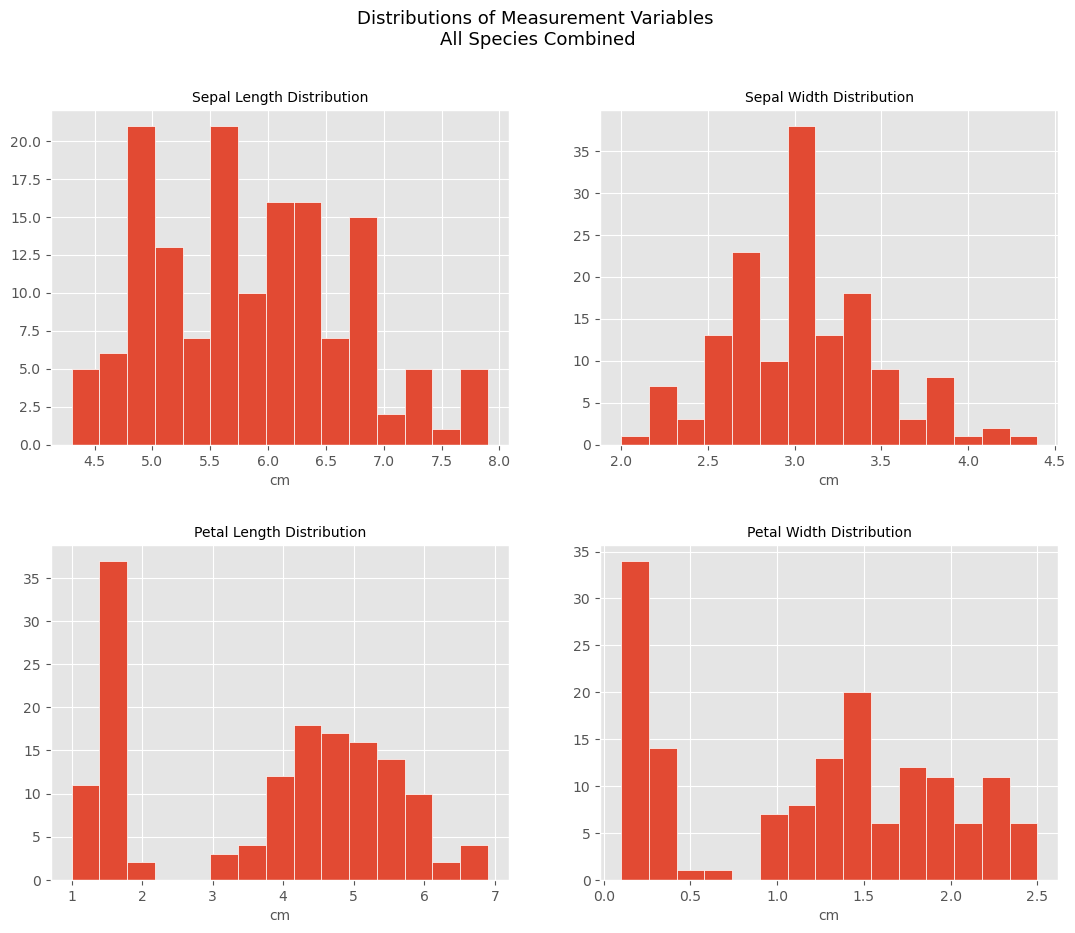

In [16]:
# Assign variables to each of the dataset measurement variables
sepal_l = iris['sepal_length_cm']
sepal_w = iris['sepal_width_cm']
petal_l = iris['petal_length_cm']
petal_w = iris['petal_width_cm']

# Use matplotlib to plot and style the figure that will house the histogram axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))
plt.style.use('ggplot')
plt.subplots_adjust(hspace=.3)

# Generate, format, and title the histogram axes for each measurement variable
axes[0, 0].hist(sepal_l, edgecolor='white', bins=15)
axes[0, 0].set_title('Sepal Length Distribution', fontsize=10)
axes[0, 0].set_xlabel('cm', fontsize=10)

axes[0, 1].hist(sepal_w, edgecolor='white', bins=15)
axes[0, 1].set_title('Sepal Width Distribution', fontsize=10)
axes[0, 1].set_xlabel('cm', fontsize=10)

axes[1, 0].hist(petal_l, edgecolor='white', bins=15)
axes[1, 0].set_title('Petal Length Distribution', fontsize=10)
axes[1, 0].set_xlabel('cm', fontsize=10)

axes[1, 1].hist(petal_w, edgecolor='white', bins=15)
axes[1, 1].set_title('Petal Width Distribution', fontsize=10)
axes[1, 1].set_xlabel('cm', fontsize=10)

# Generate a title for the overall figure
fig.suptitle('Distributions of Measurement Variables \nAll Species Combined', fontsize=13)

# Save a copy of the histograms as a png file
plt.savefig('histogram.png')

### 3.2 Histograms by Species

#### 3.2.1 Iris Setosa Distributions

Text(0.5, 0.98, 'Iris Setosa Distributions')

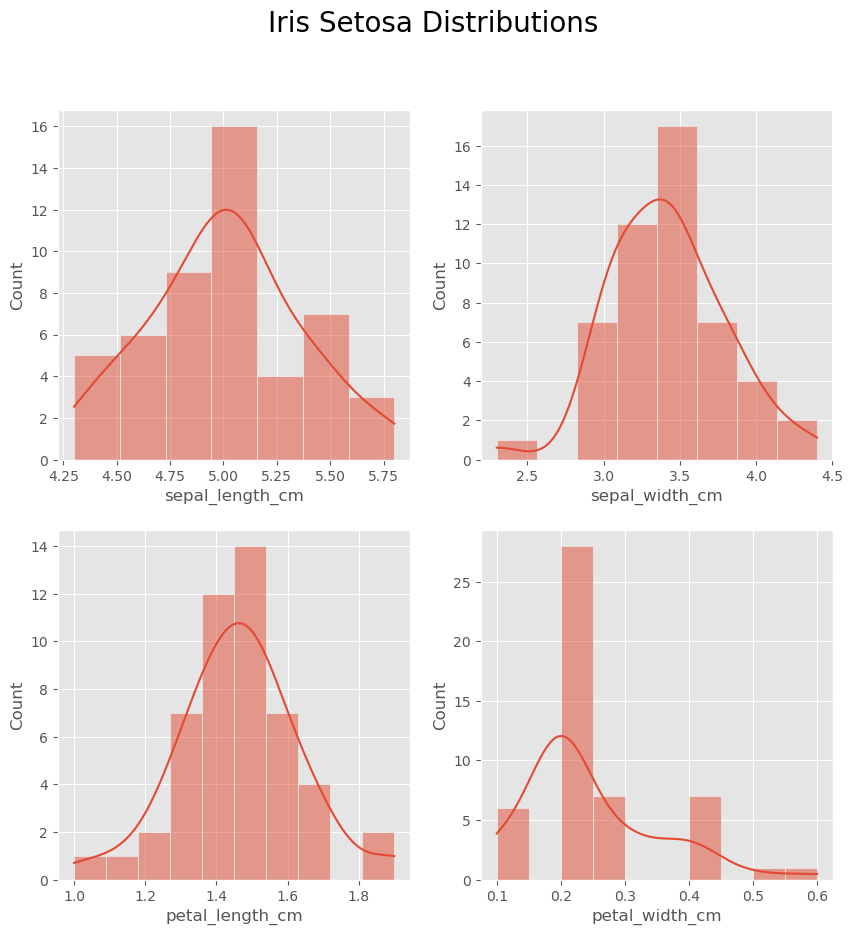

In [17]:
# Dataframe for Iris-setosa values only
setosa = iris[iris['class'] == 'Iris-setosa']

# Use matplotlib to plot and style the figure that will house the histogram axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.style.use('ggplot')


sns.histplot(data=setosa, x="sepal_length_cm", kde=True, ax=axes[0, 0])
sns.histplot(data=setosa, x="sepal_width_cm", kde=True, ax=axes[0, 1])
sns.histplot(data=setosa, x="petal_length_cm", kde=True, ax=axes[1, 0])
sns.histplot(data=setosa, x="petal_width_cm", kde=True, ax=axes[1, 1])

fig.suptitle('Iris Setosa Distributions', fontsize=20)

#### 3.2.2 Iris Versicolor Distributions

Text(0.5, 0.98, 'Iris Versicolor Distributions')

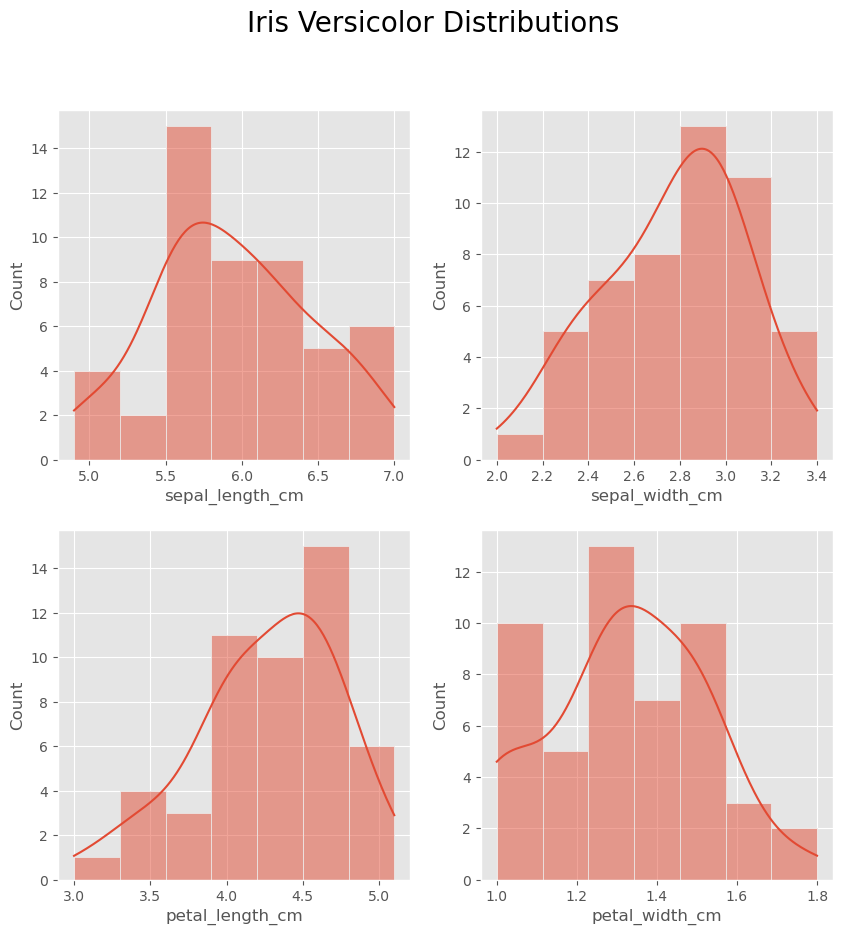

In [18]:
# Dataframe for Iris-versicolor values only
versicolor = iris[iris['class'] == 'Iris-versicolor']

# Use matplotlib to plot and style the figure that will house the histogram axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.style.use('ggplot')


sns.histplot(data=versicolor, x="sepal_length_cm", kde=True, ax=axes[0, 0])
sns.histplot(data=versicolor, x="sepal_width_cm", kde=True, ax=axes[0, 1])
sns.histplot(data=versicolor, x="petal_length_cm", kde=True, ax=axes[1, 0])
sns.histplot(data=versicolor, x="petal_width_cm", kde=True, ax=axes[1, 1])

fig.suptitle('Iris Versicolor Distributions', fontsize=20)

#### 3.2.3 Iris Virginica Distributions

Text(0.5, 0.98, 'Iris Virginica Distributions')

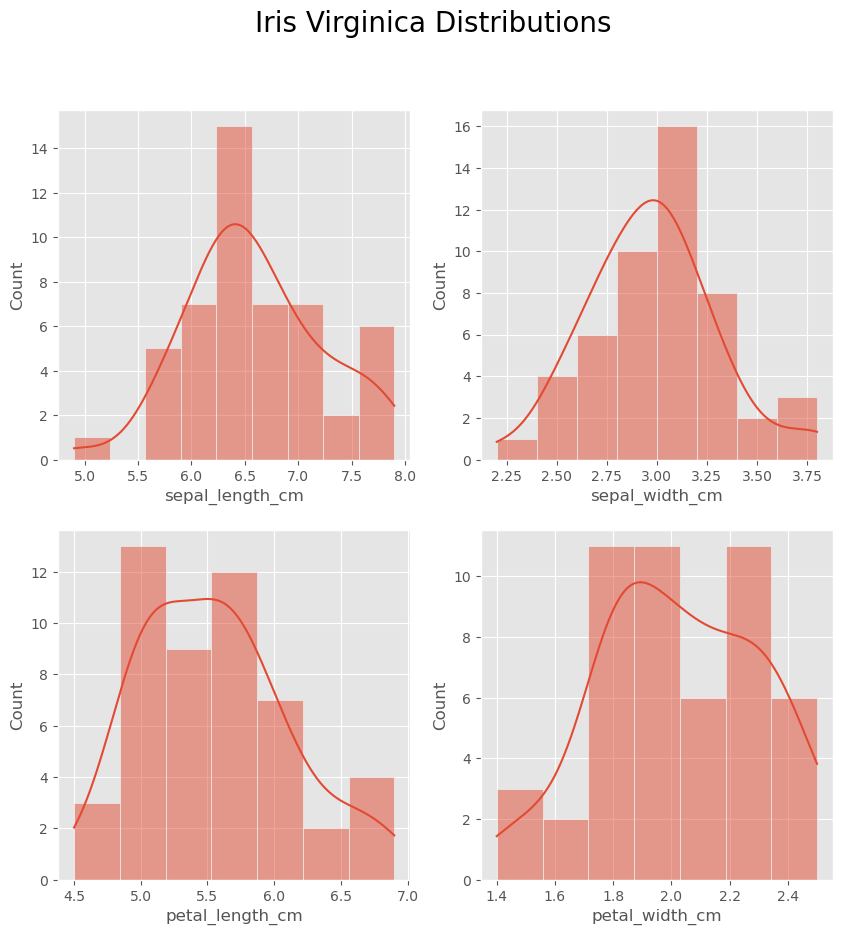

In [19]:
# Dataframe for Iris-virginica values only
virginica = iris[iris['class'] == 'Iris-virginica']

# Use matplotlib to plot and style the figure that will house the histogram axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.style.use('ggplot')


sns.histplot(data=virginica, x="sepal_length_cm", kde=True, ax=axes[0, 0])
sns.histplot(data=virginica, x="sepal_width_cm", kde=True, ax=axes[0, 1])
sns.histplot(data=virginica, x="petal_length_cm", kde=True, ax=axes[1, 0])
sns.histplot(data=virginica, x="petal_width_cm", kde=True, ax=axes[1, 1])

fig.suptitle('Iris Virginica Distributions', fontsize=20)

### 3.3 Summary

## 4. Correlations